# **Set up**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/1. Churn Prediction/

/content/drive/MyDrive/Projects/1. Churn Prediction


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Projects/1. Churn Prediction'

# **Importing datasets**

In [ ]:
# data containing customer information and churn target variable
DATASET_A = "telecom_customer_churn.csv"

# descriptions of columns in DATASET_A
DATASET_B = "telecom_data_dictionary.csv"

In [ ]:
df = pd.read_csv(DATASET_A)
df.shape

(7043, 38)

In [ ]:
data_dictionary = pd.read_csv(DATASET_B, encoding='unicode_escape')

# data dictionary shape does not match dataset shape as there are 2 extra
# entries which are for another dataset (not DATASET_A)
data_dictionary.shape

(40, 3)

In [ ]:
data_dictionary.columns

Index(['Table', 'Field', 'Description'], dtype='object')

In [ ]:
data_dictionary["Table"].unique()

array(['Customer Churn', 'Zip Code Population'], dtype=object)

In [ ]:
data_dictionary = data_dictionary[data_dictionary["Table"] == "Customer Churn"]

In [ ]:
# now the data_dictionary shape matches the training data shape
data_dictionary.shape

(38, 3)

# **Exploring DATASET_B**

In [ ]:
data_dictionary["Description"] = data_dictionary["Description"].apply(lambda x: str(x))

<ipython-input-12-b1b70cce75bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dictionary["Description"] = data_dictionary["Description"].apply(lambda x: str(x))


In [ ]:
# click magic wand to convert into an interactive table
data_dictionary

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the t..."
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,Indicates the number of dependents that live w...
5,Customer Churn,City,The city of the customers primary residence i...
6,Customer Churn,Zip Code,The zip code of the customers primary residence
7,Customer Churn,Latitude,The latitude of the customers primary residence
8,Customer Churn,Longitude,The longitude of the customers primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has...


In [ ]:
def get_description_of_field(field):
  index = list(data_dictionary["Field"]).index(field)
  return data_dictionary[data_dictionary["Field"]==field]["Description"][index]

In [ ]:
get_description_of_field("Internet Type")

"Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)"

# **Exploring DATASET_A**

In [ ]:
df.rename({"Customer ID": "CustomerID"}, axis=1, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
print("Unique values of categorical columns\n")
for col in df.columns:
  if not df[col].dtype in ["int64", "float64"]: 
    print(f"{col}:")
    print(f"\tUniques: {df[col].unique()}")
    print(f"\tNumber of uniques: {df[col].nunique()}\n")

Unique values of categorical columns

CustomerID:
	Uniques: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
	Number of uniques: 7043

Gender:
	Uniques: ['Female' 'Male']
	Number of uniques: 2

Married:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

City:
	Uniques: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
	Number of uniques: 1106

Offer:
	Uniques: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
	Number of uniques: 6

Phone Service:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Multiple Lines:
	Uniques: ['No' 'Yes' nan]
	Number of uniques: 2

Internet Service:
	Uniques: ['Yes' 'No']
	Number of uniques: 2

Internet Type:
	Uniques: ['Cable' 'Fiber Optic' 'DSL' nan]
	Number of uniques: 3

Online Security:
	Uniques: ['No' 'Yes' nan]
	Number of uniques: 2

Online Backup:
	Uniques: ['Yes' 'No' nan]
	Number of uniques: 2

Device Protection Plan:
	Uniques: ['No' 'Yes' nan]
	Number of uniques: 2

Premium T

In [ ]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
df.isnull().sum()

CustomerID                              0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
df["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [ ]:
# removing null values (excluding last two columns "Churn Category" and "Churn Reason")

cleaned_df = df.iloc[:, :-2].dropna(axis=1)

In [ ]:
df = pd.concat([cleaned_df, df.iloc[:, -2:]], axis=1)

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service', 'Internet Service',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df.shape

(7043, 26)

In [ ]:
df.isnull().sum()

CustomerID                        0
Gender                            0
Age                               0
Married                           0
Number of Dependents              0
City                              0
Zip Code                          0
Latitude                          0
Longitude                         0
Number of Referrals               0
Tenure in Months                  0
Offer                             0
Phone Service                     0
Internet Service                  0
Contract                          0
Paperless Billing                 0
Payment Method                    0
Monthly Charge                    0
Total Charges                     0
Total Refunds                     0
Total Extra Data Charges          0
Total Long Distance Charges       0
Total Revenue                     0
Customer Status                   0
Churn Category                 5174
Churn Reason                   5174
dtype: int64

# **EDA**

In [ ]:
df.head()

,CustomerID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


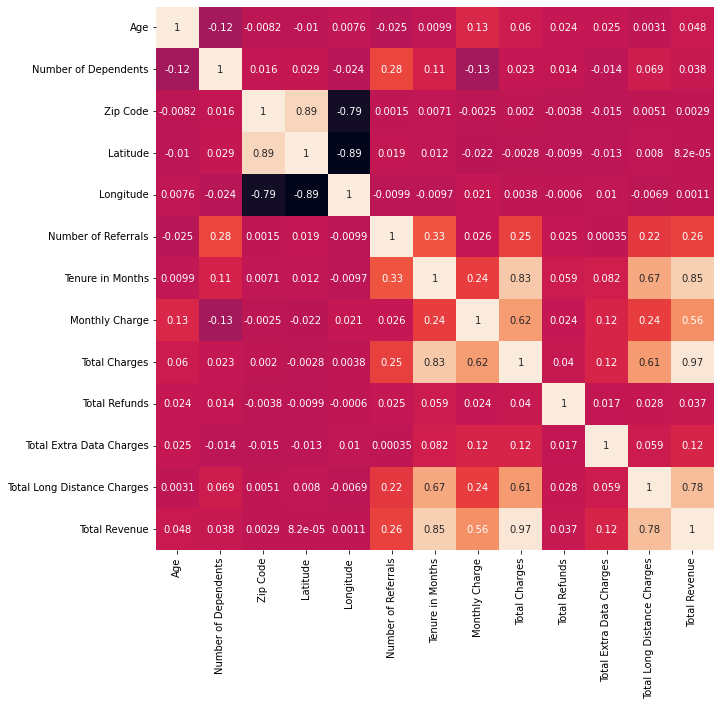

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
df.iloc[0]

CustomerID                       0002-ORFBO
Gender                               Female
Age                                      37
Married                                 Yes
Number of Dependents                      0
City                           Frazier Park
Zip Code                              93225
Latitude                          34.827662
Longitude                       -118.999073
Number of Referrals                       2
Tenure in Months                          9
Offer                                  None
Phone Service                           Yes
Internet Service                        Yes
Contract                           One Year
Paperless Billing                       Yes
Payment Method                  Credit Card
Monthly Charge                         65.6
Total Charges                         593.3
Total Refunds                           0.0
Total Extra Data Charges                  0
Total Long Distance Charges          381.51
Total Revenue                   

In [ ]:
df.iloc[1]

CustomerID                         0003-MKNFE
Gender                                   Male
Age                                        46
Married                                    No
Number of Dependents                        0
City                                 Glendale
Zip Code                                91206
Latitude                            34.162515
Longitude                         -118.203869
Number of Referrals                         0
Tenure in Months                            9
Offer                                    None
Phone Service                             Yes
Internet Service                          Yes
Contract                       Month-to-Month
Paperless Billing                          No
Payment Method                    Credit Card
Monthly Charge                           -4.0
Total Charges                           542.4
Total Refunds                           38.33
Total Extra Data Charges                   10
Total Long Distance Charges       

Observation: Total Revenue = Total Charges + Total Extra Data Charges + Total Long Distance Charges - Total Refunds

In [ ]:
# merging Total Charges, Total Extra Data Charges, and Total Long Distance
# Charges into a single column

df["Total Charges"] = df["Total Charges"] + df["Total Extra Data Charges"] + df["Total Long Distance Charges"]
df.drop(columns=["Total Extra Data Charges", "Total Long Distance Charges"], inplace=True)

In [ ]:
# dropping Total Revenue column

df.drop(columns=["Total Revenue"], inplace=True)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service', 'Internet Service',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Customer Status', 'Churn Category',
       'Churn Reason'],
      dtype='object')

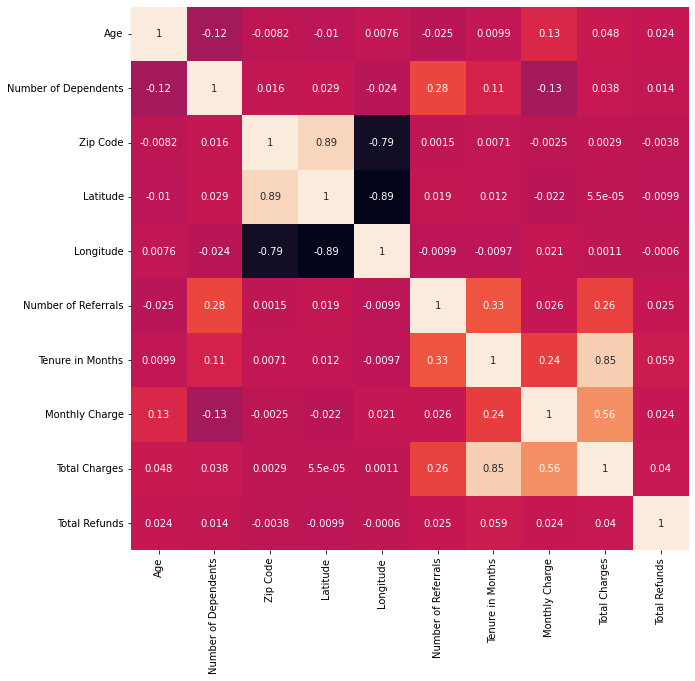

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
# dropping latitude and longitude

df.drop(columns=["Latitude", "Longitude"], inplace=True)

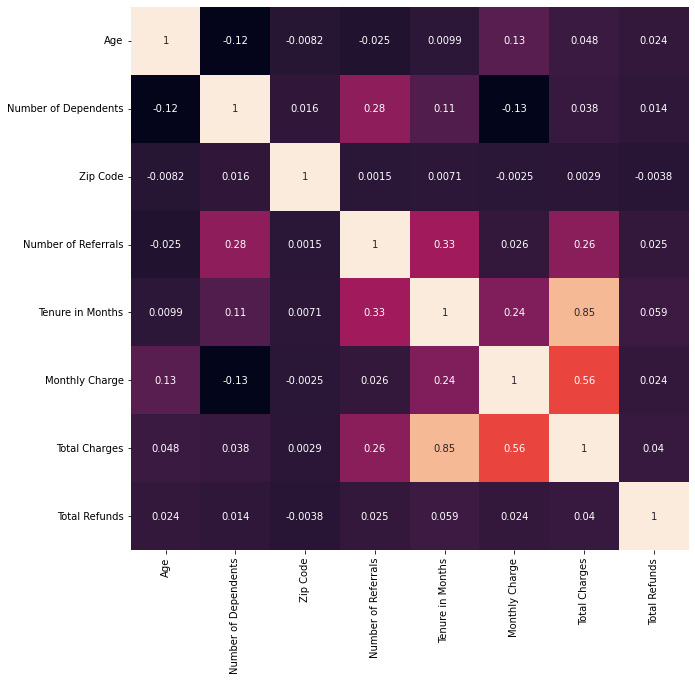

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df.head()

,CustomerID,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,...,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,None,...,Yes,One Year,Yes,Credit Card,65.6,974.81,0.00,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,None,...,Yes,Month-to-Month,No,Credit Card,-4.0,648.61,38.33,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,0,4,Offer E,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,415.45,0.00,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,1,13,Offer D,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1599.51,0.00,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,3,3,None,...,Yes,Month-to-Month,Yes,Credit Card,83.9,289.54,0.00,Churned,Dissatisfaction,Network reliability


In [ ]:
for col in df.columns:
  if df[col].dtype in ["int64", "float64"]:
    print(col)

Age
Number of Dependents
Zip Code
Number of Referrals
Tenure in Months
Monthly Charge
Total Charges
Total Refunds


In [ ]:
px.histogram(df["Age"])

In [ ]:
px.histogram(df["Number of Dependents"])

In [ ]:
px.histogram(df["Number of Referrals"])

In [ ]:
px.histogram(df["Tenure in Months"])

In [ ]:
px.histogram(df["Monthly Charge"])

In [ ]:
px.histogram(df["Total Charges"])

In [ ]:
px.histogram(df["Total Refunds"])

In [ ]:
df.drop(columns=["City"], inplace=True)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Zip Code', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Married                    0
Number of Dependents       0
Zip Code                   0
Number of Referrals        0
Tenure in Months           0
Offer                      0
Phone Service              0
Internet Service           0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charge             0
Total Charges              0
Total Refunds              0
Customer Status            0
Churn Category          5174
Churn Reason            5174
dtype: int64

In [ ]:
df.to_csv('Trial 1: output_cleaned_dataset.csv', index=False)